<a href="https://colab.research.google.com/github/gomlfx/ApiaryFund/blob/master/AGC27_2_0_1_stats_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
#License: GPL 
#Creator: Mike Smith https://github.com/gomlfx 
#designed for colab/kaggle/Jupyter

In [55]:
import pandas as pd
import numpy as np
#import matplotlib for plotting 
import matplotlib.pyplot as plt
%matplotlib inline
#import normalization
from sklearn import preprocessing 

In [56]:
#metatrader5 file format
df=pd.read_table('/content/EURUSD_Daily_197101040000_202205250000.csv')

In [57]:
print(df.head())
print(df.tail())
df.info()

       <DATE>  <OPEN>  <HIGH>   <LOW>  <CLOSE>  <TICKVOL>  <VOL>  <SPREAD>
0  1971.01.04  0.5369  0.5369  0.5369   0.5369          1      0        50
1  1971.01.05  0.5366  0.5366  0.5366   0.5366          1      0        50
2  1971.01.06  0.5365  0.5365  0.5365   0.5365          1      0        50
3  1971.01.07  0.5368  0.5368  0.5368   0.5368          1      0        50
4  1971.01.08  0.5371  0.5371  0.5371   0.5371          1      0        50
           <DATE>   <OPEN>   <HIGH>    <LOW>  <CLOSE>  <TICKVOL>  <VOL>  \
13238  2022.05.19  1.04609  1.06073  1.04590  1.05854     115331      0   
13239  2022.05.20  1.05816  1.05990  1.05328  1.05582      93700      0   
13240  2022.05.23  1.05601  1.06975  1.05561  1.06881      89168      0   
13241  2022.05.24  1.06878  1.07489  1.06611  1.07333      96527      0   
13242  2022.05.25  1.07329  1.07382  1.07103  1.07126       9067      0   

       <SPREAD>  
13238         0  
13239         0  
13240         0  
13241         0  
13242    

In [58]:
df

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,1971.01.04,0.53690,0.53690,0.53690,0.53690,1,0,50
1,1971.01.05,0.53660,0.53660,0.53660,0.53660,1,0,50
2,1971.01.06,0.53650,0.53650,0.53650,0.53650,1,0,50
3,1971.01.07,0.53680,0.53680,0.53680,0.53680,1,0,50
4,1971.01.08,0.53710,0.53710,0.53710,0.53710,1,0,50
...,...,...,...,...,...,...,...,...
13238,2022.05.19,1.04609,1.06073,1.04590,1.05854,115331,0,0
13239,2022.05.20,1.05816,1.05990,1.05328,1.05582,93700,0,0
13240,2022.05.23,1.05601,1.06975,1.05561,1.06881,89168,0,0
13241,2022.05.24,1.06878,1.07489,1.06611,1.07333,96527,0,0


In [59]:
d = df[["<OPEN>","<HIGH>","<LOW>","<CLOSE>"]]
df = pd.DataFrame(data=d)
df

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,0.53690,0.53690,0.53690,0.53690
1,0.53660,0.53660,0.53660,0.53660
2,0.53650,0.53650,0.53650,0.53650
3,0.53680,0.53680,0.53680,0.53680
4,0.53710,0.53710,0.53710,0.53710
...,...,...,...,...
13238,1.04609,1.06073,1.04590,1.05854
13239,1.05816,1.05990,1.05328,1.05582
13240,1.05601,1.06975,1.05561,1.06881
13241,1.06878,1.07489,1.06611,1.07333


In [60]:
df_raw1 = pd.DataFrame(data=df)
df_raw1

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,0.53690,0.53690,0.53690,0.53690
1,0.53660,0.53660,0.53660,0.53660
2,0.53650,0.53650,0.53650,0.53650
3,0.53680,0.53680,0.53680,0.53680
4,0.53710,0.53710,0.53710,0.53710
...,...,...,...,...
13238,1.04609,1.06073,1.04590,1.05854
13239,1.05816,1.05990,1.05328,1.05582
13240,1.05601,1.06975,1.05561,1.06881
13241,1.06878,1.07489,1.06611,1.07333


In [61]:
stop_df = pd.DataFrame(data=df.tail(40))  
stop_df.iloc[:-1] 
stop_df1 = stop_df[stop_df['<OPEN>'] > stop_df['<CLOSE>']]
print(stop_df1)

stop_df2 = stop_df[stop_df['<OPEN>'] < stop_df['<CLOSE>']]
print(stop_df2)


        <OPEN>   <HIGH>    <LOW>  <CLOSE>
13203  1.11579  1.11848  1.10613  1.10665
13204  1.10656  1.10757  1.10283  1.10447
13205  1.10336  1.10543  1.09608  1.09715
13206  1.09688  1.09886  1.09000  1.09041
13207  1.09029  1.09381  1.08741  1.08956
13208  1.08956  1.09382  1.08649  1.08777
13209  1.08764  1.08921  1.08364  1.08747
13210  1.09159  1.09333  1.08729  1.08829
13211  1.08825  1.09035  1.08216  1.08269
13213  1.08897  1.09233  1.07576  1.08286
13214  1.08278  1.08303  1.07961  1.08113
13215  1.07994  1.08213  1.07702  1.07810
13218  1.08496  1.09364  1.08239  1.08336
13219  1.08368  1.08519  1.07707  1.08009
13220  1.08071  1.08145  1.06965  1.07125
13221  1.07106  1.07388  1.06353  1.06372
13222  1.06363  1.06547  1.05144  1.05573
13223  1.05571  1.05646  1.04709  1.04983
13225  1.05421  1.05681  1.04902  1.05072
13228  1.06196  1.06419  1.04928  1.05410
13231  1.05570  1.05851  1.05257  1.05281
13232  1.05281  1.05770  1.05017  1.05092
13233  1.05092  1.05291  1.03540  

In [62]:

stop_df1['stop_for_sell'] = stop_df1['<HIGH>'] - stop_df1['<OPEN>']
print(stop_df1.stop_for_sell)
stop_df2['stop_for_buy'] = stop_df2['<OPEN>'] - stop_df2['<LOW>']
print(stop_df2.stop_for_buy) 

stop_df2['tp_for_buy'] = stop_df['<HIGH>'] - stop_df['<OPEN>'] 
print(stop_df2.tp_for_buy) 
stop_df1['tp_for_sell'] = stop_df['<OPEN>'] - stop_df['<LOW>']
print(stop_df1.tp_for_sell)

13203    0.00269
13204    0.00101
13205    0.00207
13206    0.00198
13207    0.00352
13208    0.00426
13209    0.00157
13210    0.00174
13211    0.00210
13213    0.00336
13214    0.00025
13215    0.00219
13218    0.00868
13219    0.00151
13220    0.00074
13221    0.00282
13222    0.00184
13223    0.00075
13225    0.00260
13228    0.00223
13231    0.00281
13232    0.00489
13233    0.00199
13237    0.00174
13239    0.00174
13242    0.00053
Name: stop_for_sell, dtype: float64
13212    0.00166
13216    0.00193
13217    0.00049
13224    0.00070
13226    0.00148
13227    0.00126
13229    0.00585
13230    0.00433
13234    0.00285
13235    0.00072
13236    0.00034
13238    0.00019
13240    0.00040
13241    0.00267
Name: stop_for_buy, dtype: float64
13212    0.00686
13216    0.00336
13217    0.00791
13224    0.00951
13226    0.00705
13227    0.01120
13229    0.00574
13230    0.00538
13234    0.00417
13235    0.00471
13236    0.01250
13238    0.01464
13240    0.01374
13241    0.00611
Name: tp_fo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [63]:
print(stop_df1.stop_for_sell.describe(percentiles=[.25,.5,.75,.9,.95,.99]))
print(stop_df2.stop_for_buy.describe(percentiles=[.25,.5,.75,.9,.95,.99]))

count    26.000000
mean      0.002370
std       0.001685
min       0.000250
25%       0.001613
50%       0.002030
75%       0.002780
90%       0.003890
95%       0.004733
99%       0.007733
max       0.008680
Name: stop_for_sell, dtype: float64
count    14.000000
mean      0.001776
std       0.001661
min       0.000190
25%       0.000542
50%       0.001370
75%       0.002485
90%       0.003886
95%       0.004862
99%       0.005652
max       0.005850
Name: stop_for_buy, dtype: float64


In [64]:
print(stop_df1.tp_for_sell.describe(percentiles=[.25,.5,.75,.9,.95,.99]))
print(stop_df2.tp_for_buy.describe(percentiles=[.25,.5,.75,.9,.95,.99]))

count    26.000000
mean      0.006567
std       0.003849
min       0.002260
25%       0.003140
50%       0.005640
75%       0.008650
90%       0.012435
95%       0.013077
99%       0.014942
max       0.015520
Name: tp_for_sell, dtype: float64
count    14.000000
mean      0.008063
std       0.003664
min       0.003360
25%       0.005470
50%       0.006955
75%       0.010777
90%       0.013368
95%       0.014055
99%       0.014523
max       0.014640
Name: tp_for_buy, dtype: float64


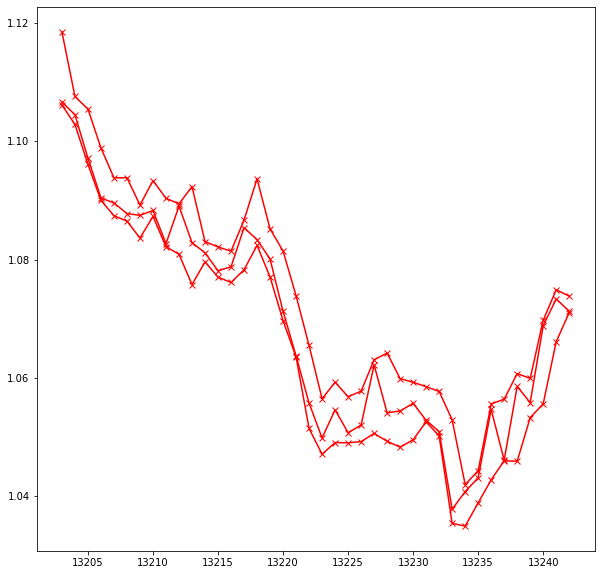

In [65]:
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
#include actual high and low range
line1_h = plt.plot(stop_df['<HIGH>'], label = 'actual high', marker='x', color='r')
line1_l = plt.plot(stop_df['<LOW>'], label = 'actual low', marker='x', color='r')
line1_c = plt.plot(stop_df['<CLOSE>'], label = 'actual close', marker='x', color='r')

In [66]:
stop_for_sell = stop_df1.stop_for_sell.describe()
stop_for_buy = stop_df2.stop_for_buy.describe()
 